<a href="https://colab.research.google.com/github/Soham1306/DLAssignments/blob/main/iris_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

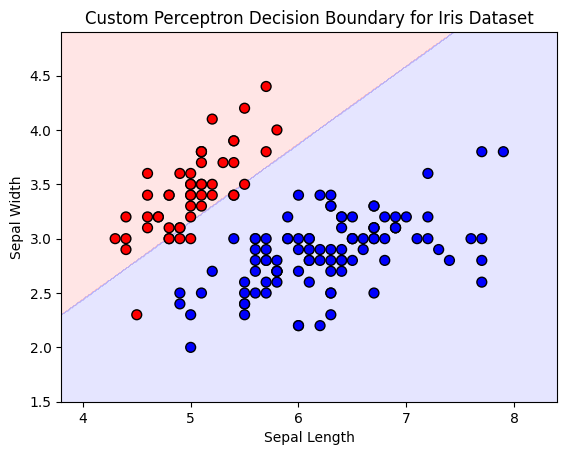

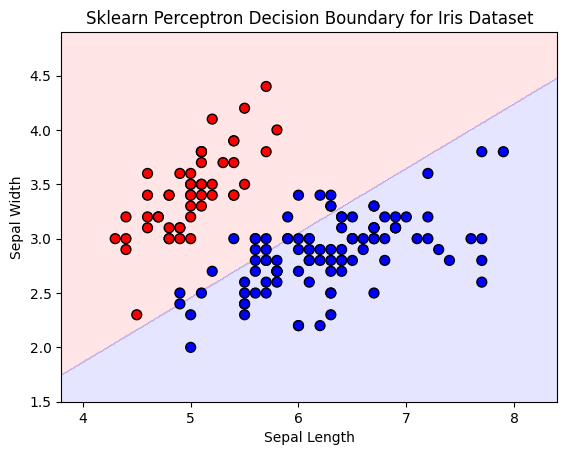

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.linear_model import Perceptron as SklearnPerceptron

class PerceptronModel:
    """
    A simple implementation of the Perceptron algorithm.
    """
    def __init__(self, learning_rate=0.1, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Fit the perceptron model to the training data.
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Loop over the training data for a fixed number of iterations.
        for _ in range(self.max_iter):
            for i in range(n_samples):
                # Compute the linear output.
                linear_output = np.dot(X[i], self.weights) + self.bias
                # Apply the step activation function.
                y_pred = 1 if linear_output >= 0 else 0
                # Calculate the update.
                update = self.learning_rate * (y[i] - y_pred)
                # Update weights and bias.
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        """
        Predict binary class labels for samples in X.
        """
        # Ensure X is a 2D array.
        X = np.atleast_2d(X)
        return np.array([
            1 if np.dot(x, self.weights) + self.bias >= 0 else 0
            for x in X
        ])

def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    """
    Plot the decision boundary of a classifier along with the data points.
    """
    # Determine the bounds of the plot.
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Create a mesh grid.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on each point in the grid.
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Define color maps.
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['red', 'blue'])

    # Plot the decision boundary.
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    # Plot the training points.
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=50)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()

def main():
    # Load the Iris dataset.
    iris = datasets.load_iris()
    # Use only the first two features: sepal length and width.
    X = iris.data[:, :2]
    # Create a binary classification problem: setosa vs. non-setosa.
    y = (iris.target != 0).astype(int)

    # Option 1: Use the custom perceptron implementation.
    custom_perceptron = PerceptronModel(learning_rate=0.1, max_iter=100)
    custom_perceptron.fit(X, y)
    plot_decision_boundary(X, y, custom_perceptron,
                           "Custom Perceptron Decision Boundary for Iris Dataset")

    # Option 2: Use scikit-learn's Perceptron.
    sklearn_perceptron = SklearnPerceptron(eta0=0.1, max_iter=100, tol=None, random_state=42)
    sklearn_perceptron.fit(X, y)

    # Ensure compatibility with the plot function.
    class SklearnPerceptronWrapper:
        def __init__(self, model):
            self.model = model

        def predict(self, X):
            return self.model.predict(X)

    plot_decision_boundary(X, y, SklearnPerceptronWrapper(sklearn_perceptron),
                           "Sklearn Perceptron Decision Boundary for Iris Dataset")

if __name__ == '__main__':
    main()
